In [75]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Obtener los nombres de la lista de elementos

In [61]:
direccion_dataset = "/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/" #Poner la dirección del dataset aquí
ruta_clinical_readings= os.path.join(direccion_dataset, "ClinicalReadings/")
ruta_cxr_png = os.path.join(direccion_dataset, "CXR_png/")
extension_cxr = "png"
extension_cr = "txt" #Extension Clinical Reading
lista_elementos_dataset = os.listdir(ruta_clinical_readings)
datos = [] #np.zeros((len(lista_elementos_dataset),), dtype=[("path", np.str_), ("genre", np.str_), ("age", "f4"), ("condition", "a10")])

for idx, elemento in enumerate(lista_elementos_dataset):
    nombre_elemento = elemento.split(".")[0]
    ruta_elemento_cxr = os.path.join(ruta_cxr_png, "{}.{}".format(nombre_elemento, extension_cxr))
    ruta_elemento_cr = os.path.join(ruta_clinical_readings, "{}.{}".format(nombre_elemento, extension_cr))
    with open(ruta_elemento_cr, 'r') as archivo_texto:
        datos_archivo_texto = archivo_texto.read() #Obtengo la informacion del dataset
        print(datos_archivo_texto)
        datos_archivo_texto = datos_archivo_texto.rstrip() #Eliminar tabulación final
        datos_archivo_texto.replace("\t", "")
        atributos_archivo = datos_archivo_texto.split('\n') #Separar por enters
        condicion_paciente = atributos_archivo[-1] #Ultimo elemento
        genero = ""
        edad = 0
        if "," in atributos_archivo[0]:
            genero_edad = atributos_archivo[0].rstrip().lstrip().split(",")
        
        else:
            genero_edad = atributos_archivo[0].rstrip().split(" ")
            #Verificar si el genero y la edad estan unidos
            if len(genero_edad) == 1:
                if genero_edad[0].find('female') == 0:
                    print("=================Female")
                    genero_edad.append(genero_edad[0].lstrip("female"))
                    genero_edad[0] = "female"
                    print("Arreglando: {}".format(genero_edad))
                elif genero_edad[0].find('male') == 0:
                    genero_edad.append(genero_edad[0].lstrip("male"))
                    genero_edad[0] = "male"
        #Eliminar los caracteres vacios
        genero_edad = [valido for valido in genero_edad if valido]

        genero, edad = genero_edad[0:2]

        if "yrs" in edad: #Convertir a int
            edad = edad.rstrip("yrs")
        elif "yr" in edad: #Convertir a int
            edad = edad.rstrip("yr")
        elif "month" in edad: #Convertir a int
            edad = edad.rstrip("month")
            edad = float(edad)/12.0
        elif "days" in edad: #Convertir a int
            edad = edad.rstrip("days")
            edad = float(edad)/365.0
        
        genero = genero.lower()
        edad = float(edad)
    ruta_elemento_clinical_reading = os.path.join(ruta_clinical_readings)
    print((ruta_elemento_cxr, genero, edad, condicion_paciente))
    datos.append({"path":ruta_elemento_cxr, "genre": genero, "age": edad,  "condition": condicion_paciente})



female 62yrs
normal
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0272_0.png', 'female', 62.0, 'normal')
male 45yrs
normal
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0001_0.png', 'male', 45.0, 'normal')
male 63yrs
normal
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0002_0.png', 'male', 63.0, 'normal')
female 48yrs
normal 
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0003_0.png', 'female', 48.0, 'normal')
male 58yrs 
normal
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0004_0.png', 'male', 58.0, 'normal')
male 28yrs
normal
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0005_0.png', 'male', 28.0, 'normal')
male 60yrs
normal
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0006_0.png', 'male', 60.0, 'normal')
female 53yrs
normal
('/media/josejacomeb/Datos1/DatasetsMédicos/Ch

('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0571_1.png', 'female', 36.0, 'Right PTB')
female 57yrs  	
bilateral PTB 	
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0572_1.png', 'female', 57.0, 'bilateral PTB')
male 32yrs  	
bilateral PTB 	
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0573_1.png', 'male', 32.0, 'bilateral PTB')
female 35yrs  	
Right PTB 	
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0574_1.png', 'female', 35.0, 'Right PTB')
female 33yrs  	
bilateral PTB 	
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0575_1.png', 'female', 33.0, 'bilateral PTB')
male 63yrs  	
Right PTB 	
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0576_1.png', 'male', 63.0, 'Right PTB')
female 74yrs  	
Right PTB 	
('/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/CXR_png/CHNCXR_0577_1.png', 'female', 74

In [66]:
panda_datos = pd.DataFrame(datos)

In [74]:
len(panda_datos.path)

662

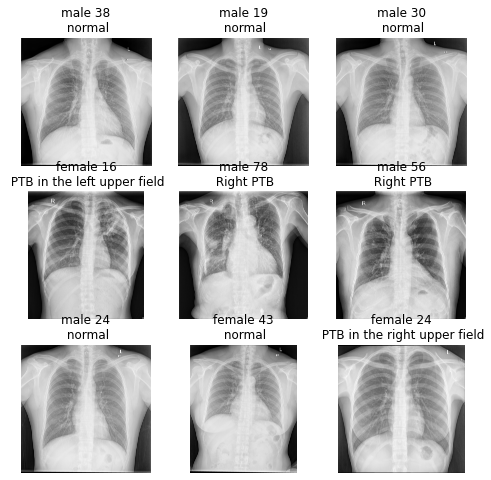

In [78]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
total_datos = len(panda_datos.path)
for i in range(1, cols * rows + 1):
    sample_idx = int(random.random()*total_datos)
    img = mpimg.imread(panda_datos.path[sample_idx])
    label = "{} {}\n {}".format(panda_datos.genre[sample_idx], int(panda_datos.age[sample_idx]), panda_datos.condition[sample_idx])
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()